<a href="https://colab.research.google.com/github/nikag2006/cap-comp215/blob/main/Ghassemi_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - PROJECT 1
----------------
#### Name: Nika Ghassemi
#### Date: Jan 18 2026

#### Earthquake Dashboard

This notebook creates a simple earthquake dashboard using data from the USGS Earthquake API, reporting key earthquake metrics over a selected time period, magnitude range, and location. The dashboard is parameterized so that users can change the values at the top of the notebook and re-run all cells to update the display accordingly.

## Metrics Reported
The dashboard reports the following earthquake metrics:
1. Number of earthquakes per day  
2. Earthquakes by magnitude range
3. Average earthquake magnitude
4. Spatial distribution of earthquakes (3D: latitude, longitude, depth)

In [3]:
# ---------------- DASHBOARD PARAMETERS ----------------#

MIN_MAGNITUDE = 3.0

START_DATE = "2024-01-01"
END_DATE = "2024-01-31"

LOCATION_FILTER = ""
TIME_WINDOW = "day"

##How to use this dashboard:

This notebook creates a simple earthquake dashboard using data from the USGS Earthquake API. It reports key earthquake metrics over a selected time period, magnitude range, and location. The dashboard is parameterized so users can change values at the top of the notebook and re-run all cells to update the display.

To view and customize the earthquake dashboard, you can adjust a few variables in the code before running it. Start by changing the MIN_MAGNITUDE value if you want to filter earthquakes based on their strength. Increasing this value will show only stronger earthquakes, while lowering it will include weaker ones as well. You can also modify the START_DATE and END_DATE variables to choose the time range you want the dashboard to display. If you are interested in earthquakes from a specific area, you can enter a keyword into the LOCATION_FILTER variable to limit the results to that location.

The dashboard also visualizes the spatial distribution of earthquakes in 3D, showing latitude, longitude, and depth, so you can get a clear sense of where and how deep earthquakes are occurring. After making any changes, rerun all the code cells in the notebook to update and view the dashboard with your new settings.

In [4]:
# Data Model
from datetime import datetime

class Earthquake:
  def __init__(self, magnitude:float, place:str, time: datetime, depth:float, latitude:float, longitude:float):
    self.magnitude = magnitude
    self.place = place
    self.time = time
    self.depth = depth
    self.latitude = latitude
    self.longitude = longitude

  def __str__(self) -> str:
    return f"Magnitude: {self.magnitude}, Time: {self.time.strftime('%Y-%m-%d %H:%M:%S UTC')}, Latitude: {self.latitude:.2f}, Longitude: {self.longitude:.2f}"

In [5]:
# Fetch Data from USGS API
import requests

url = "https://earthquake.usgs.gov/fdsnws/event/1/query"

params = {
    "format": "geojson",
    "starttime": START_DATE,
    "endtime": END_DATE,
    "minmagnitude": MIN_MAGNITUDE
}

response = requests.get(url, params=params)
data = response.json()

In [6]:
# Convert API Data into Earthquake Objects
from datetime import datetime, UTC

earthquakes = []

for feature in data["features"]:
    props = feature["properties"]
    coords = feature["geometry"]["coordinates"]

    eq = Earthquake(
        magnitude=props["mag"],
        place=props["place"],
        time = datetime.fromtimestamp(props["time"] / 1000, tz=UTC),
        depth=coords[2],
        latitude=coords[1],
        longitude=coords[0]
    )

    if LOCATION_FILTER.lower() in eq.place.lower():
        earthquakes.append(eq)

In [7]:
# Earthquakes per day
from collections import Counter

quakes_per_day = Counter(eq.time.date() for eq in earthquakes)
print(quakes_per_day)

Counter({datetime.date(2024, 1, 1): 102, datetime.date(2024, 1, 23): 96, datetime.date(2024, 1, 22): 91, datetime.date(2024, 1, 24): 76, datetime.date(2024, 1, 29): 73, datetime.date(2024, 1, 30): 67, datetime.date(2024, 1, 3): 67, datetime.date(2024, 1, 4): 63, datetime.date(2024, 1, 25): 58, datetime.date(2024, 1, 27): 52, datetime.date(2024, 1, 20): 52, datetime.date(2024, 1, 19): 52, datetime.date(2024, 1, 28): 51, datetime.date(2024, 1, 8): 51, datetime.date(2024, 1, 2): 50, datetime.date(2024, 1, 7): 49, datetime.date(2024, 1, 18): 48, datetime.date(2024, 1, 15): 47, datetime.date(2024, 1, 6): 47, datetime.date(2024, 1, 5): 47, datetime.date(2024, 1, 26): 46, datetime.date(2024, 1, 13): 45, datetime.date(2024, 1, 12): 45, datetime.date(2024, 1, 9): 45, datetime.date(2024, 1, 16): 44, datetime.date(2024, 1, 11): 44, datetime.date(2024, 1, 21): 43, datetime.date(2024, 1, 17): 41, datetime.date(2024, 1, 14): 41, datetime.date(2024, 1, 10): 32})


In [8]:
# Earthquakes by magnitude range
magnitude_bins = {
    "3–4": 0,
    "4–5": 0,
    "5–6": 0,
    "6+": 0
}

for eq in earthquakes:
    if 3 <= eq.magnitude < 4:
        magnitude_bins["3–4"] += 1
    elif 4 <= eq.magnitude < 5:
        magnitude_bins["4–5"] += 1
    elif 5 <= eq.magnitude < 6:
        magnitude_bins["5–6"] += 1
    elif eq.magnitude >= 6:
        magnitude_bins["6+"] += 1

In [9]:
# Average magnitude
average_magnitude = sum(eq.magnitude for eq in earthquakes) / len(earthquakes)
print(average_magnitude)

4.264930930930931


In [10]:
#Dashboard Display
import matplotlib.pyplot as plt

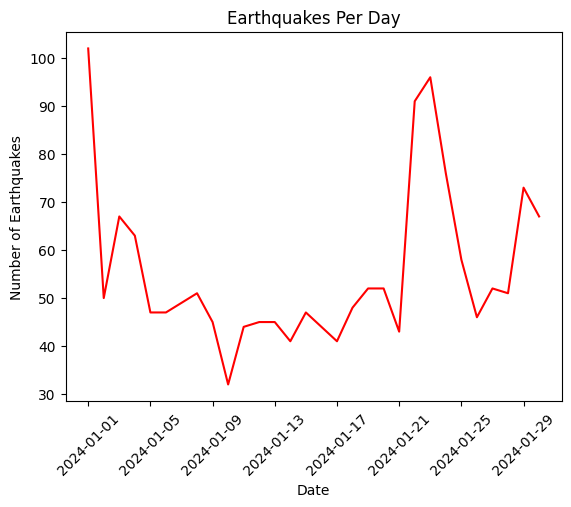

In [11]:
# Line chart — Earthquakes per day
dates = sorted(quakes_per_day.keys())
counts = [quakes_per_day[d] for d in dates]

plt.figure()
plt.plot(dates, counts, 'red')
plt.xlabel("Date")
plt.ylabel("Number of Earthquakes")
plt.title("Earthquakes Per Day")
plt.xticks(rotation=45)
plt.show()

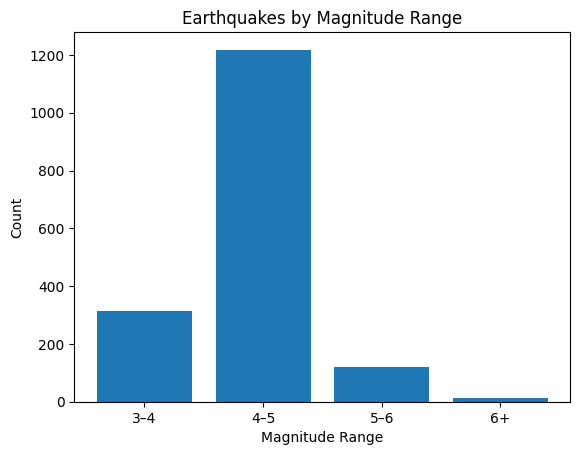

In [13]:
# Bar chart — Magnitude ranges
plt.figure()
plt.bar(magnitude_bins.keys(), magnitude_bins.values())
plt.xlabel("Magnitude Range")
plt.ylabel("Count")
plt.title("Earthquakes by Magnitude Range")
plt.show()

In [14]:
# Numerical summary
print(f"Total earthquakes: {len(earthquakes)}")
print(f"Average magnitude: {average_magnitude:.2f}")

Total earthquakes: 1665
Average magnitude: 4.26


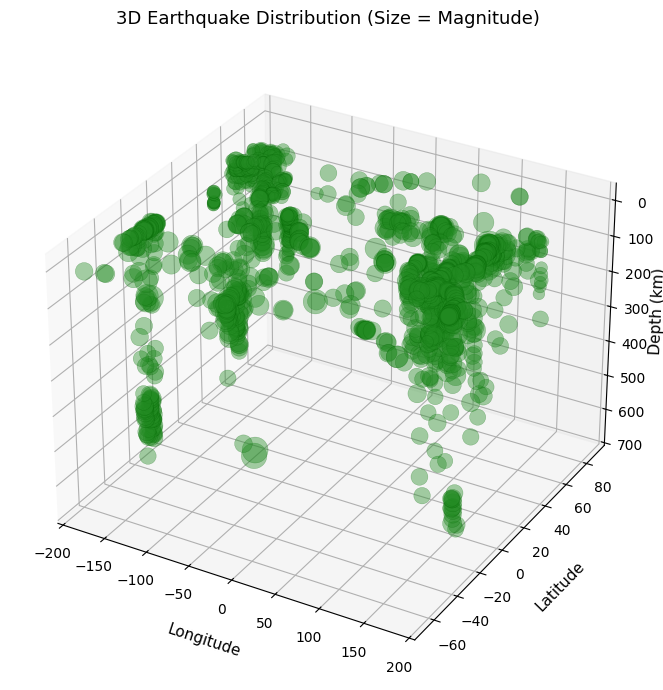

In [16]:
# 3D Earthquake Spatial Distribution
import matplotlib.pyplot as plt

lons = [eq.longitude for eq in earthquakes]
lats = [eq.latitude for eq in earthquakes]
deps = [eq.depth for eq in earthquakes]
sizes = [(eq.magnitude ** 2) * 8 for eq in earthquakes]

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(projection="3d")

ax.scatter(
    lons,
    lats,
    deps,
    s=sizes,
    alpha=0.4,
    edgecolors="darkgreen",
    linewidths=0.3,
    color="forestgreen"
)

ax.set_xlabel("Longitude", labelpad=10, fontsize=11)
ax.set_ylabel("Latitude", labelpad=10, fontsize=11)
ax.set_zlabel("Depth (km)", labelpad=0, fontsize=11)
ax.set_title("3D Earthquake Distribution (Size = Magnitude)", fontsize=13, pad=15)

ax.grid(True, linestyle="--", alpha=0.3)
ax.invert_zaxis()  # depth goes downward

plt.tight_layout()
plt.show()

### Dashboard Notes

* Data is sourced from the United States Geological Survey (USGS) Earthquake API.
* All timestamps are displayed in Coordinated Universal Time (UTC).

* Visualization and summary results depend on the parameter values set at the top of the notebook, including magnitude threshold, date range, and optional location filtering.

* The 3D scatter plot shows the spatial distribution of earthquakes using longitude, latitude, and depth coordinates.

* Marker size is proportional to earthquake magnitude; larger markers represent stronger earthquakes, making significant seismic events easier to identify visually.

* The depth axis is inverted so that depth increases downward, matching geological interpretation of subsurface earthquake activity.

* The visualization helps reveal geographic clustering, seismic zone structure, and depth variation patterns that are difficult to observe from numerical summaries alone.

* Users can rerun the notebook after modifying parameters to refresh the dashboard and regenerate plots.

* Plot styling is optimized for clarity, readability, and clean presentation of spatial seismic data.